## 注意

このノートブックは**2018**年の西研教育のために作成されたものである。機械学習は移り変わりが激しい分野のためその年ごとに修正することをおすすめする（特にニューラルネットの項）。　2018年教育担当　中村太一

# 目次

1. 目的
2. 機械学習実践
    1. データを用意（タイタニック号）
    2. サポートベクトルマシン(SVM)
    3. ランダムフォレスト(RF)
    4. ニューラルネット(NN)
    5. 学習器の出力の相関
3. 学習器の特性
    1. データを用意（生成データ）
    1. サポートベクトルマシン(SVM)
    2. ランダムフォレスト(RF)
    3. ニューラルネット(NN)

# 1.目的

## 本講義では「機械学習を正しく使用する知識」の獲得を目的とします

さっそく実践！！

# 2.機械学習実践 

ライブラリ読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## A.データを用意（タイタニック号）

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" width="480px">

タイタニック号の生存者/死亡者データを読み込み(https://www.kaggle.com/c/titanic/data)

In [2]:
titanic_data = pd.read_csv('train.csv')
print(titanic_data.shape)
titanic_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


このデータはタイタニック号の乗客の名前、性別、チケットのクラス等の情報と沈没による生存/死亡のデータで、乗客の情報から生存/死亡を予測したい

使うデータの中で欠損値を含むものを削除する

In [3]:
titanic_data = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna(axis=0)
print(titanic_data.shape)

(714, 6)


実数値データだけ取り出してくる

In [4]:
real_data = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
real_data.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


### Tips:
> - 本来であれば適当な処理を施すことで名義尺度を（Idや名前等)も順序尺度する（そういった処理が要らない学習器もある：決定木）
> - [名義尺度、順序尺度、間隔尺度、比率尺度](https://mathwords.net/syakudo)

In [5]:
#numpy.array型で乗客のでデータと生存情報を置く
real_values = real_data.values
survived_or_not_values = titanic_data['Survived'].values

学習器を学習させるためのデータ（train）と学習器をテストするためのデータ（test）に分ける
- このとき、trainとtestにデータの偏りが起こらないようにランダムに分割する

In [6]:
#ランダムに分割するためのランダムなインデックスを用意
shuffle_index = np.arange(real_values.shape[0])
np.random.seed(1919) #乱数のシードを1919に固定（通常は要らない。講義の都合上必要）
np.random.shuffle(shuffle_index)

train_length = 500 #学習データの大きさ
x_train, x_test = real_values[shuffle_index[:train_length]], real_values[shuffle_index[train_length:]]
t_train, t_test = survived_or_not_values[shuffle_index[:train_length]], survived_or_not_values[shuffle_index[train_length:]]

## B.サポートベクトルマシン（SVM）

<img src="http://datachemeng.com/wp-content/uploads/2017/06/SnapCrab_2017-6-23_16-29-54_No-00.png" width="640px" "SVM">

In [7]:
from sklearn.svm import SVC
svm = SVC(random_state=0)  # SVMの学習器を用意
svm.fit(x_train, t_train)# 学習データを学習

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

実はさまざまなパラメータがデフォルトとして指定されている

In [8]:
y = svm.predict(x_test)
R  = sklearn.metrics.classification_report(y, t_test)
a = sklearn.metrics.accuracy_score(t_test, y)
print(R)
print('accuracy:', a)

             precision    recall  f1-score   support

          0       0.69      0.73      0.71       124
          1       0.59      0.54      0.57        90

avg / total       0.65      0.65      0.65       214

accuracy: 0.64953271028


Positive(=1)のデータを対象した場合 Negativeの場合はNとPを反転  [wikipedia precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

$Precision =  \frac{TP}{TP + FP} \\
Recall =  \frac{TP}{TP + FN} \\
F =  2\frac{Precision*Recall}{Precision + Recall}$ 

## C.ランダムフォレスト（RF）

<img src="https://alphaimpact.jp/assets/2017/03/random_forest.png" width="640px" "RF">

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)  # RFの学習器を用意
rf.fit(x_train, t_train)# 学習データを学習

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [10]:
y = rf.predict(x_test)
R  = sklearn.metrics.classification_report(y, t_test)
a = sklearn.metrics.accuracy_score(t_test, y)
print(R)
print('accuracy:', a)

             precision    recall  f1-score   support

          0       0.73      0.73      0.73       132
          1       0.57      0.57      0.57        82

avg / total       0.67      0.67      0.67       214

accuracy: 0.668224299065


## D.ニューラルネット（N.N）

<img src="https://alphaimpact.jp/assets/2017/05/multilayer_perceptron.png", width="480px" "2 Layer Perceptron">

In [11]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=0)
nn.fit(x_train, t_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
y = nn.predict(x_test)
R  = sklearn.metrics.classification_report(y, t_test)
a = sklearn.metrics.accuracy_score(t_test, y)
print(R)
print('accuracy:', a)

             precision    recall  f1-score   support

          0       0.80      0.63      0.71       166
          1       0.27      0.46      0.34        48

avg / total       0.68      0.59      0.62       214

accuracy: 0.593457943925


## E.学習器の出力の相関

In [13]:
clf_list = [svm, rf, nn]
y_list = []
for clf in clf_list:
    y_list.append(clf.predict(x_test))
y_list = np.array(y_list)

それぞれの学習器判定の関係性について見てみる

In [14]:
def kuraberu(a, b, name_a, name_b):
    result = []
    print(name_b+'|'+name_a+'\t0\t1')
    print('0\t{}\t{}\t{}'.format((b[a==0]==0).sum(), (b[a==1]==0).sum(), (b==0).sum()))
    print('1\t{}\t{}\t{}'.format((b[a==0]==1).sum(), (b[a==1]==1).sum(), (b==1).sum()))
    print('\t{}\t{}\t{}'.format((a==0).sum(), (a==1).sum(), a.shape[0]))

SVM と RF

In [15]:
kuraberu(y_list[0], y_list[1], 'svm', 'rf')
print('相関', np.corrcoef(y_list[0], y_list[1])[0,1])

rf|svm	0	1
0	103	29	132
1	21	61	82
	124	90	214
相関 0.516253896248


SVM と N.N

In [16]:
kuraberu(y_list[0], y_list[2], 'svm', 'nn') 
print('相関', np.corrcoef(y_list[0], y_list[2])[0,1])

nn|svm	0	1
0	105	61	166
1	19	29	48
	124	90	214
相関 0.200002271618


RF と N.N

In [17]:
kuraberu(y_list[1], y_list[2], 'rf', 'nn')
print('相関', np.corrcoef(y_list[1], y_list[2])[0,1])

nn|rf	0	1
0	112	54	166
1	20	28	48
	132	82	214
相関 0.221388244133


### アンサンブル学習
様々な「独立な」学習器を集めて、多数決を取ることで全体としての精度を向上させようという考え方

In [18]:
y = (y_list.sum(axis=0) > 1).astype(np.int) #３つの学習器の多数決を取る
R  = sklearn.metrics.classification_report(y, t_test)
a = sklearn.metrics.accuracy_score(t_test, y)
print(R)
print('accuracy:', a)

             precision    recall  f1-score   support

          0       0.79      0.74      0.76       140
          1       0.55      0.62      0.59        74

avg / total       0.71      0.70      0.70       214

accuracy: 0.696261682243


「独立な」学習器を構成できていないため精度の向上は見られなかった

## 課題
ナイーブベイズ（NB）、決定木（DT）、K近傍法（KNN）を上の学習器同様に学習させ、それぞれについて評価する

ヒントは[hints.txt](./hints.txt)にあります。

In [19]:
from sklearn.neighbors import KNeighborsClassifier #K近傍法
from sklearn.tree import DecisionTreeClassifier #決定木
from sklearn.naive_bayes import GaussianNB #ナイーブベイズ

clf_list = [KNeighborsClassifier,  DecisionTreeClassifier, GaussianNB]
clf_name = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB']
y_list_for_exercises = []
for f, name in zip(clf_list, clf_name):
    print(name)
    clf = f().fit(x_train, t_train)
    y = clf.predict(x_test)
    y_list_for_exercises.append(y)
    R  = sklearn.metrics.classification_report(y, t_test)
    a = sklearn.metrics.accuracy_score(t_test, y)
    print(R)
    print('accuracy:', a, '\n------------------------------------------------------------')

y_list_for_exercises = np.array(y_list_for_exercises)
y = (y_list_for_exercises.sum(axis=0) > 1).astype(np.int) #３つの学習器の多数決を取る
R  = sklearn.metrics.classification_report(y, t_test)
a = sklearn.metrics.accuracy_score(t_test, y)
print('アセンブル学習')
print(R)
print('accuracy:', a)

KNeighborsClassifier
             precision    recall  f1-score   support

          0       0.70      0.73      0.72       126
          1       0.59      0.56      0.57        88

avg / total       0.66      0.66      0.66       214

accuracy: 0.658878504673 
------------------------------------------------------------
DecisionTreeClassifier
             precision    recall  f1-score   support

          0       0.71      0.68      0.69       137
          1       0.47      0.51      0.49        77

avg / total       0.62      0.62      0.62       214

accuracy: 0.616822429907 
------------------------------------------------------------
GaussianNB
             precision    recall  f1-score   support

          0       0.80      0.70      0.75       150
          1       0.46      0.59      0.52        64

avg / total       0.70      0.67      0.68       214

accuracy: 0.668224299065 
------------------------------------------------------------
アセンブル学習
             precision    recal

実際にsklearnを使って実装を行いたいときは次の図を参考に選択すると良い<img src="http://scikit-learn.org/stable/_static/ml_map.png" widht="640px">

# 3.学習器の特性

### Tips:
>3章はsklearnのドキュメントである[このページ](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)に準拠して作成した。sklearnのドキュメントは他にも様々な学習器が紹介されている上、学習器を実装するに当たっての引数の意味から例まで至れり尽くせりである。

実はさまざまなパラメータがデフォルトとして指定されていて、この項ではそのパラメータ（**ハイパーパラメータ**）を変化させてその挙動を確かめる

### Tips:
> 機械学習を扱う上で「パラメータ」は頻発するワードだ。そのなかでも学習器自身が自動で獲得するものではなく、人の手で指定しなけばいけないものを他と区別して**ハイパーパラメータ**と呼ぶ。

ここからはランダムに作成したデータを学習させて学習器の特性を見ていく

## A. データを用意（生成データ）

In [20]:
from sklearn.datasets import make_moons, make_circles, make_classification

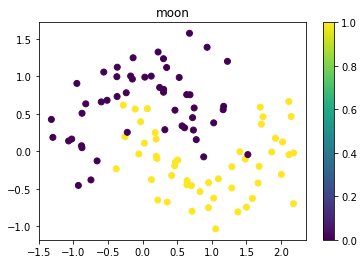

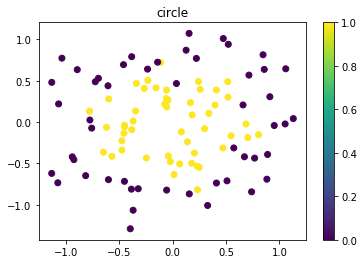

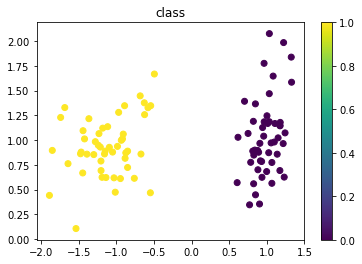

In [21]:
moon_data = make_moons(noise=0.3, random_state=0)
circle_data = make_circles(noise=0.2, factor=0.5, random_state=1)
class_data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
datasets = [moon_data,
            circle_data,
            class_data
            ]
names = ['moon', 'circle', 'class']
for d,name in zip(datasets, names):
    X, t = d
    plt.scatter(X[:,0], X[:,1], c = t)
    plt.title(name)
    plt.colorbar()
    plt.show()

学習器の特性を可視化するための関数（詳細を見る必要はない）

In [ ]:
moon_data = make_moons(noise=0.3, random_state=0)
circle_data = make_circles(noise=0.2, factor=0.5, random_state=1)
class_data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
datasets = [moon_data,
            circle_data,
            class_data
            ]
names = ['moon', 'circle', 'class']
def show_character_ML(clf):
    for d, name in zip(datasets, names):
        X, t = d
        clf.fit(X, t)# 学習データを学習
        x = np.linspace(X[:,0].min()-.5, X[:,0].max() +.5, 100)
        y = np.linspace(X[:,1].min()-.5, X[:,1].max() +.5, 100)
        xx, yy = np.meshgrid(x, y)
        grid = np.c_[xx.ravel(), yy.ravel()]
        if hasattr(clf, "decision_function"):
            plt.contourf(xx, yy, clf.decision_function(grid).reshape(xx.shape))
        else:
            plt.contourf(xx, yy, clf.predict_proba(grid)[:, 1].reshape(xx.shape))
        plt.scatter(X[:,0], X[:,1], c = t)
        plt.title(name)
        plt.colorbar()
        plt.show()

## B. サポートベクトルマシン(SVM)

まずはデフォルトのままの挙動を見てみる

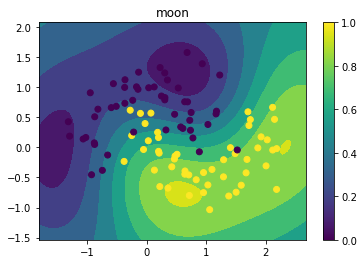

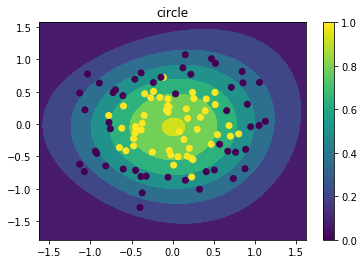

In [ ]:
show_character_ML(SVC(random_state=0))

### SVMの基本：カーネル関数

カーネル関数を用いない（線形なカーネル関数を使う）場合のSVMの挙動

In [ ]:
show_character_ML(SVC(random_state=0, kernel='linear'))

実はSVMは超平面（2次元上の線、3次元上の面）で分割をしており、カーネル関数を通さないときは上のようなまっすぐな分離以外出来ない

次に、まっすぐな分離しか出来ないSVMにカーネル関数を与えることでグニャグニャした（非線形な）分離を可能にさせる。ここで、登場するのが係数gammaである

### gammaを変化させてみる

In [ ]:
for gamma in [1e-5, 1e+0]:
    print('gamma=',gamma)
    show_character_ML(SVC(random_state=0 ,gamma=gamma))

詳細は[ここ](http://scikit-learn.org/stable/modules/svm.html#svm-kernels)を見ること、gammaの増加にともなって非線形な識別が強くなっている

### Tips:
> SVMではカーネル関数として大概RBF(ラジアル基底関数)を使えば良いということになっている。実際、sklearnの実装でも初期値はRBFを使うことになっている、RBFはガウス関数と同じ形状をしていて、事実上、無限次元にサンプル点を写像したあとに線形SVMで分離した場合と等価である

## C. ランダムフォレスト(RF)

例によって、まずはデフォルトのまま見てみる

In [ ]:
show_character_ML(RandomForestClassifier(random_state=0))

SVMと異なりカクカクした形状の分類をしているのが分かる。これはRFの用いる[決定木](http://scikit-learn.org/stable/modules/tree.html)の性質によるものだ

つぎにmax_depthを変えて、その変化を見る

In [ ]:
for dep in [1, 2, 4]:
    print('max_depth=',dep)
    show_character_ML(RandomForestClassifier(random_state=0, max_depth=dep))

max_depthが大きいほど学習データに過度に沿った形を表現していることが分かる

実はランダムフォレストは先に紹介した**アンサンブル学習**の１つの応用例である。[決定木](http://scikit-learn.org/stable/modules/tree.html)という学習器を複数（初期値では10個）作って、その多数決を取っている。ここではその決定木の深さの最大値であるmax_depthを変化させた

## D. ニューラルネット(NN)

デフォルトでの性質を見てみる

In [ ]:
show_character_ML(MLPClassifier(random_state=0))

次に、活性化関数(activation)を変えて見る

In [ ]:
for act_f in ['identity','logistic', 'tanh', 'relu']:
    print('activation=', act_f)
    show_character_ML(MLPClassifier(random_state=0, activation=act_f))

活性化関数とはニューラルネットのそれぞれのニューロンの出力に用いる関数のことである。詳しくは[活性化関数](https://ja.wikipedia.org/wiki/%E6%B4%BB%E6%80%A7%E5%8C%96%E9%96%A2%E6%95%B0)を参照してほしい

### Tips:
> 活性化関数logisticはsigmoid（シグモイド）とも呼ぶ。多くの文献ではlogisticではなくsigmoidを用いるのでこちらも覚えて置くほうが良い

ここで、活性化関数をそれぞれ見ていこう（[ここ](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)のactivationに書いてある）

In [ ]:
def identity(x):
    return x
def logistic(x):
    return 1/(1+np.exp(-x))
def tanh(x):
    return np.tanh(x)
def relu(x):
    _filter = x > 0
    return _filter*x
X = np.arange(-5, 5, 0.01)
for f,name in zip([identity, logistic, tanh, relu], ['identity', 'logistic', 'tanh','relu']):
    plt.plot(X, f(X))
    plt.title(name)
    plt.show()

どれも単純な形をしており、それほど理解も難しくないだろう。reluという名前はニューラルネット独特ではあるが、これは制御工学でも出て来るランプ関数にほかならない。

また、logisticやtanhは似た形を持っているが、歴史的に元は活性化関数がステップ関数を用いていたことに由来している

In [ ]:
def step(x):
    return (x > 0).astype(np.int)
X = np.arange(-5, 5, 0.01)
plt.plot(X, step(X))
plt.title('step')
plt.show()

2015年に[この論文中](https://www.nature.com/articles/nature14539)でReluを使うことが最善であると報告され、今ではRelu以外の活性化関数を使うことは少なくなってきた。（sklearnの初期値もreluを使っている）しかし、依然tanhなどの活性化関数を使う用途も存在する。[Why using sigmoid and tanh as the activation functions in LSTM or RNN is not problematic but this is not the case in other neural nets?](https://www.quora.com/Why-using-sigmoid-and-tanh-as-the-activation-functions-in-LSTM-or-RNN-is-not-problematic-but-this-is-not-the-case-in-other-neural-nets)

「なぜこの活性化関数が良いのか」という知見はまだ経験則以上のものはなく、「Reluは勾配消失を抑制するから」などとよく説明されるが、将来的にReluがこのまま使われる保証は今のところない

### Tips:
> ニューラルネットと一言で言ってもその言葉が指す学習器は無限大にある。今回実装したのはその中でも2層パーセプトロンである。ニューラルネットは知っての通り、脳のニューロンの働きを真似たところに由来しており、要はその真似さえしていればみんなニューラルネットである。だから、「AI」などと同様「ニューラルネット」という単語は世間のためのバズワードとしての側面が強い。ニューラルネットには代表的なものとして、CNN（Convolution NN)、RNN（Reccurent NN)といったもはや要素扱いのものや、それを組み合わせてできた実際の実装例であるAlexNetなどがある。
このように、ニューラルネットという言葉に惹かれて色々と勘違いしかねない状況なので、注意してほしい。

# おわりに

見ての通り、機械学習の実装はかなり簡単である。ライブラリを使ってしまえばほぼどのような学習器も数行で実装できる。（ただし、ニューラルネットに関してはChainer, TensorFlowなどのsklearnでないライブラリを用いるのがその学習の都合上普通である）しかし、では頭を空っぽにして使っていいかというとそうではない。そんな使い方を研究ですればたちまち質問攻めに合い、炎上すること間違いなしだ。（そういう学生が多くいるということだ）なんでも良いからというと変だが、何かしらの論理的な説明が必要になることは多々あるはずだ。そういうときに、この講義で得た知識が役立つはずである。

もちろん、この講義だけで機械学習の全てがわかる訳がない。機械学習の一部も一部でしかなく、より広い学習が今後必要だろう。しかし、機械学習へ何も前提知識を持たないとやれ「ドラえもん」だの「シュワルツネッガー」などが出てくる。こんな先入観はとりあえず取り払えたと思う。

今回は、「機械学習を正しく使用する知識の獲得」を目的として、学習器のさまざまな特性を眺めてきた。機械学習をつかうにあたって

- どの学習器を使うべきか
- どのようにパラメータを選択すべきか

はどの機械学習を扱う研究でも立ち会う問題である。選択の方法もまた様々あるが、つまるところココが研究者の腕の見せどころ、すなわち「勘」に依存しているのはなんとも言えないところではある。

実際、機械学習を使うにあたってはこの講義で習得した内容だけではかなり無理がある。例えば、機械学習では学習したいデータから**特徴量**と呼ばれる機械学習にとって都合の良い情報に変換する段階があるが、今回は一切触れなかった。これは、特徴量抽出が直接的に機械学習器の特性を示すものではなく、どちらかというと事務的な手続きや、それぞれの現象への物理的、あるいは経験的アプローチになるためで、これだけで分野ごとに本が出るほど内容が濃く、説明のきりがないためだ。他にも時系列を扱うような機械学習器などもあるが、それも省いた。これらは各自で学んでほしい。

最後に、この講義でわからなかったことはどんどん聞いてほしい。質問大歓迎！お待ちしてます